✅ Data loaded. Shape: (32400, 11)

🧪 Missing values:
Series([], dtype: int64)

📊 Summary stats:
         machine_id  vibration_level  motor_current  ambient_temp  \
count  32400.000000     32400.000000   32400.000000  32400.000000   
mean       2.000000         0.349868      40.143722     24.002885   
std        0.816509         0.120284      14.904560      2.996791   
min        1.000000         0.000000       5.000000     12.002003   
25%        1.000000         0.267829      30.019147     21.991123   
50%        2.000000         0.350388      40.085331     24.014464   
75%        3.000000         0.431970      50.162418     26.004566   
max        3.000000         0.799446      97.446733     36.606078   

         motor_temp        torque           rpm  failure_label  \
count  32400.000000  32400.000000  32400.000000   32400.000000   
mean      44.011202    220.081366   1848.814807       0.001852   
std        4.969155     59.342229    250.051818       0.042994   
min       24.39186

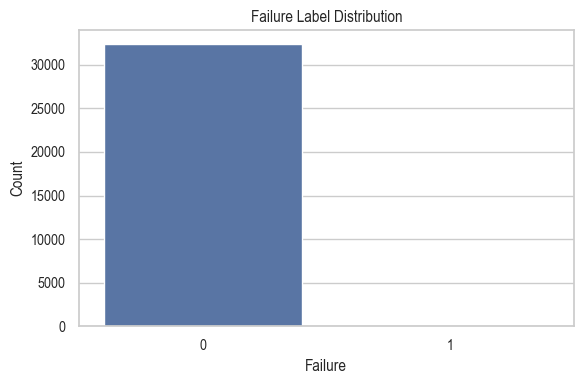

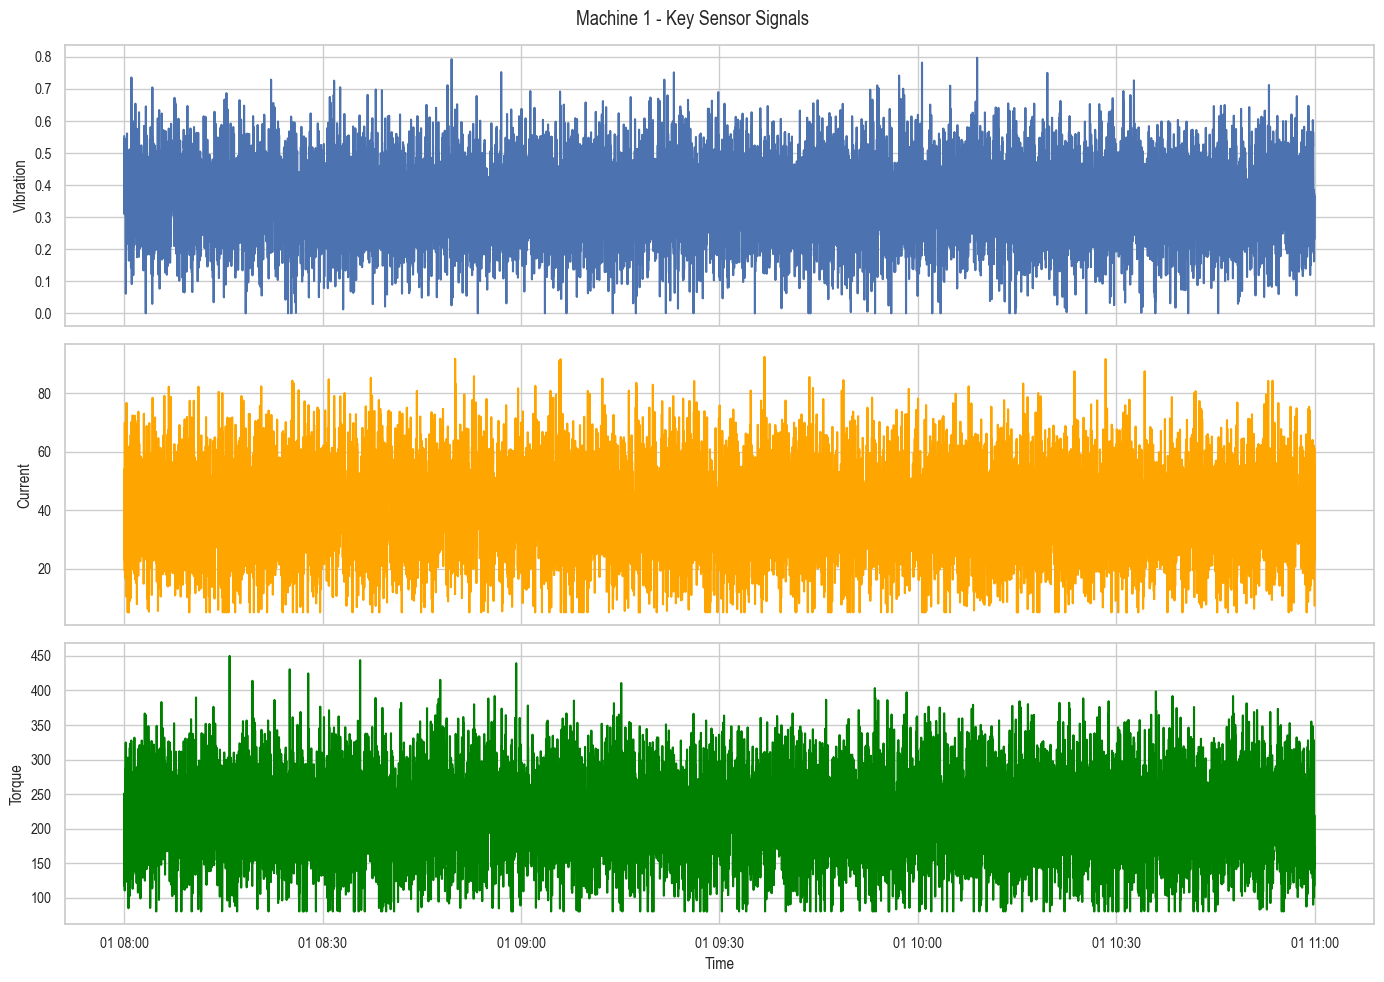

💾 Cleaned dataset saved to ..\data\processed\agri_sensor_data_cleaned.csv


In [1]:
# 01_data_cleaning.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Setup
sns.set(style="whitegrid")
RAW_PATH = Path("../data/raw/agri_synthetic_sensor_data.csv")
PROCESSED_PATH = Path("../data/processed/agri_sensor_data_cleaned.csv")

# 1. Load data
df = pd.read_csv(RAW_PATH)
print("✅ Data loaded. Shape:", df.shape)

# 2. Parse timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 3. Check for missing values
missing = df.isnull().sum()
print("\n🧪 Missing values:")
print(missing[missing > 0])

# 4. Summary statistics
print("\n📊 Summary stats:")
print(df.describe())

# 5. Check unique modes
print("\n🚜 Operating Modes:", df['operating_mode'].unique())

# 6. Sort by machine & time
df = df.sort_values(by=['machine_id', 'timestamp'])

# 7. Visualize failure label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='failure_label', data=df)
plt.title("Failure Label Distribution")
plt.xlabel("Failure")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 8. Time-series plot for one machine
sample_machine = 1
df_sample = df[df['machine_id'] == sample_machine]

fig, ax = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
ax[0].plot(df_sample['timestamp'], df_sample['vibration_level'], label='Vibration')
ax[1].plot(df_sample['timestamp'], df_sample['motor_current'], label='Current', color='orange')
ax[2].plot(df_sample['timestamp'], df_sample['torque'], label='Torque', color='green')

ax[0].set_ylabel("Vibration")
ax[1].set_ylabel("Current")
ax[2].set_ylabel("Torque")
ax[2].set_xlabel("Time")
fig.suptitle(f"Machine {sample_machine} - Key Sensor Signals")
plt.tight_layout()
plt.show()

# 9. Save cleaned dataset
df.to_csv(PROCESSED_PATH, index=False)
print(f"💾 Cleaned dataset saved to {PROCESSED_PATH}")
